# Librerias

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

In [88]:
import warnings
warnings.filterwarnings("ignore")

# Datos

In [89]:
df = pd.read_excel('datos.xlsx')

### Separacion Train Test

In [90]:
train = df[:int(0.85*(len(df)))]
test = df[int(0.85*(len(df))):]

# Modelos

## Prophet

In [91]:
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

In [92]:
tr_proph = pd.DataFrame({
    'ds': train['mes'],
    'y': train['v_total']
})
ts_proph = pd.DataFrame({
    'ds': test['mes'],
    'y': test['v_total']
})

In [93]:
m = Prophet(interval_width=0.95)
m.fit(tr_proph)

21:25:40 - cmdstanpy - INFO - Chain [1] start processing


21:25:40 - cmdstanpy - INFO - Chain [1] done processing


In [94]:
fut_proph = m.make_future_dataframe(periods=ts_proph.shape[0], freq='MS')

In [95]:
fcst_proph = m.predict(fut_proph)
#fcst_proph[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [96]:
pred_proph = fcst_proph[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

In [97]:
tr_proph

,ds,y
0,2016-12-01,0.000000e+00
1,2017-01-01,7.401473e+06
2,2017-02-01,7.413210e+06
3,2017-03-01,8.561343e+06
4,2017-04-01,8.884078e+06
...,...,...
63,2022-03-01,5.066230e+06
64,2022-04-01,5.408750e+06
65,2022-05-01,5.251651e+06
66,2022-06-01,5.022168e+06


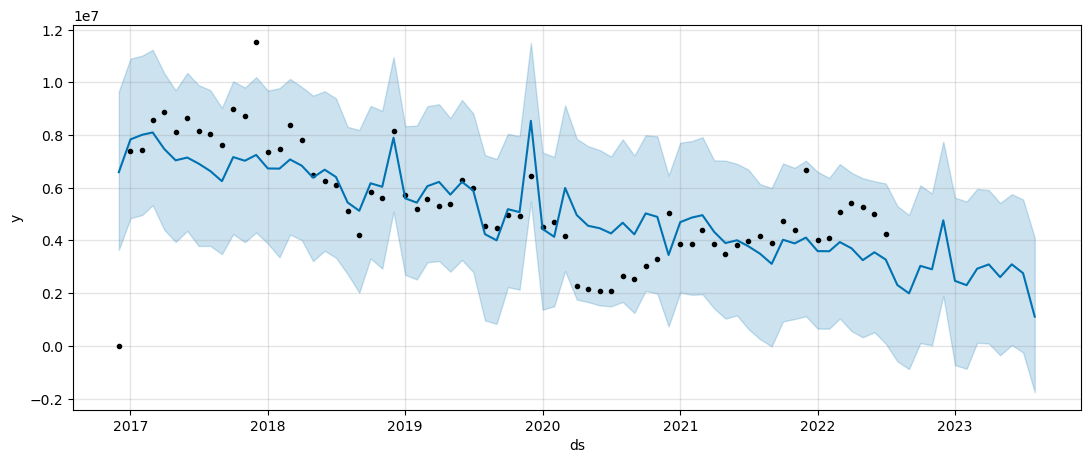

In [98]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(13)
fig = m.plot(fcst_proph,ax=ax)
plt.show()

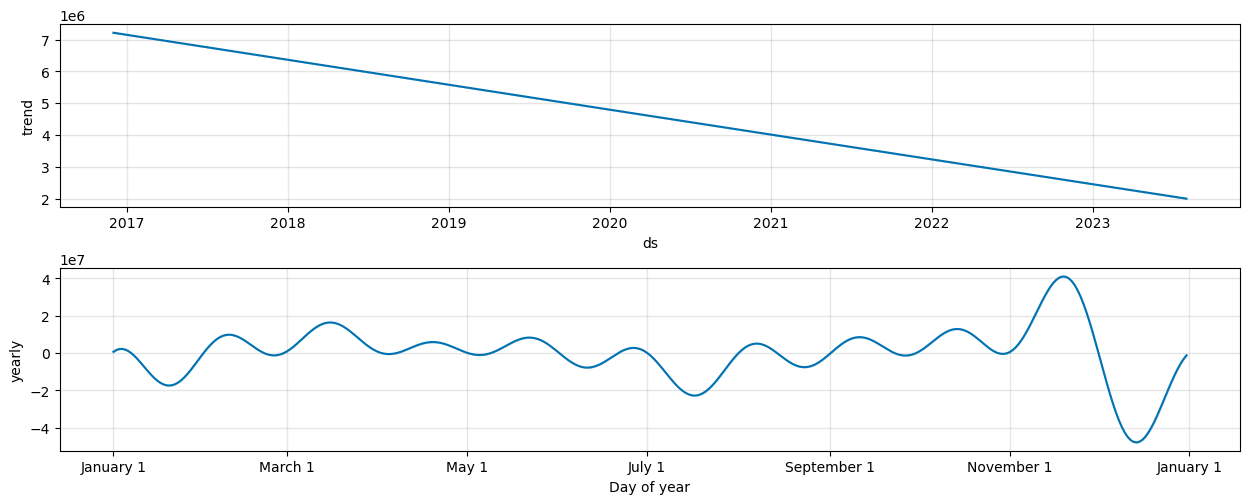

In [99]:
fig2 = m.plot_components(fcst_proph)
fig2.set_figheight(5)
fig2.set_figwidth(13)